In [1]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1. Load the dataset
# Source: http://lib.stat.cmu.edu/datasets/boston
# The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
# prices and the demand for clean air', J. Environ. Economics & Management,
# vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
# ...', Wiley, 1980.   N.B. Various transformations are used in the table on
# pages 244-261 of the latter.
# Attribute Information (in order):
#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000
#        - PTRATIO  pupil-teacher ratio by town
#        - LSTAT    % lower status of the population
#        - MEDV     Median value of owner-occupied homes in $1000's
df_raw = pd.read_csv('../data/raw/boston.csv')

In [4]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# 1.2 Take a sample
df_raw.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
199,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56,34.9
184,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98,26.4
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
485,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90,17.4
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90,30.1
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55,19.4
236,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54,25.1


In [7]:
# 1.3 Transform if needed
df_transform = df_raw.drop(['B'], axis=1)
df = df_transform.copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [10]:
# Step 2. Make a basic EDA
X=df.iloc[:,:12]
y=df.iloc[:,12]


In [13]:
# 2.1 Split the dataset so to avoid bias
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [11]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [12]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [15]:
# 2.2 Join the train sets to ease insights
df_train = pd.concat((X_train, y_train), axis=1)

In [16]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 163 to 456
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     379 non-null    float64
 1   ZN       379 non-null    float64
 2   INDUS    379 non-null    float64
 3   CHAS     379 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       379 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      379 non-null    float64
 8   RAD      379 non-null    float64
 9   TAX      379 non-null    float64
 10  PTRATIO  379 non-null    float64
 11  LSTAT    379 non-null    float64
 12  MEDV     379 non-null    float64
dtypes: float64(13)
memory usage: 41.5 KB


In [17]:
# 2.4 Take a sample
df_train.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
205,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,10.87,22.6
472,3.56868,0.0,18.10,0.0,0.580,6.437,75.0,2.8965,24.0,666.0,20.2,14.36,23.2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
113,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6.0,432.0,17.8,17.09,18.7
184,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,13.98,26.4
179,0.05780,0.0,2.46,0.0,0.488,6.980,58.4,2.8290,3.0,193.0,17.8,5.04,37.2
378,23.64820,0.0,18.10,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,23.69,13.1
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,14.59,17.1
293,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,8.58,23.9
63,0.12650,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,284.0,19.7,9.50,25.0


In [18]:
# 2.5 Describe the numerical and date variables
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.544779,11.213720,11.124828,0.060686,0.555395,6.293245,68.360950,3.751303,9.464380,407.617414,18.437203,12.584485,22.681003
std,8.843378,23.314601,6.840538,0.239069,0.116113,0.711019,28.563333,2.042150,8.592828,167.695835,2.180545,7.173761,9.209861
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082865,0.000000,5.190000,0.000000,0.451000,5.895500,43.000000,2.100350,4.000000,279.500000,17.350000,6.885000,17.150000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.249000,77.300000,3.215700,5.000000,330.000000,19.000000,11.220000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.630000,94.100000,5.108550,24.000000,666.000000,20.200000,17.130000,25.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# 2.6 Describe the categorical variables
#no categorical variables found

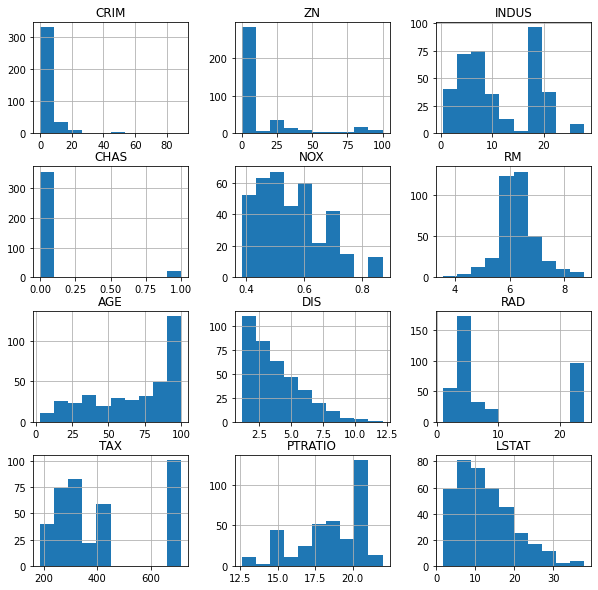

In [20]:
# 2.7 Perform univariate analysis - histograms
X_train.hist(figsize=(10,10))
plt.show()

In [ ]:
# 2.8 Perform univariate analysis - boxplots


In [ ]:
# 2.9 Perform bivariate analysis - scatter matrix


In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial


In [ ]:
# 2.11 Perform multivariate analysis - VIF

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals

In [ ]:
# 3.1 Perform model fit - A


In [ ]:
# 3.2 Perform model fit - B


In [ ]:
# 3.3 Calculate metrics on model A

In [ ]:
# 3.4 Calculate metrics on model B

In [ ]:
# Step 4. Write up your conclusions